## An explorative data analysis and building a prediction model for the hourly utilization of the bike sharing data-set

**Loading dataset and taking a look on how the data looks like**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import model_selection

data = pd.read_csv('hour.csv')

In [2]:
print(data.shape)

(17379, 17)


In [3]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
data.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


Obviously we need to remove instant since it is just an index, additionally, since we need the hourly utilization, we can remove dteday as all the information about the day is already included in other features. We can also toss away yr as we only have two years and years are not repeated. 

In [5]:
data = data.drop(['instant','dteday','yr'], axis=1)

In [6]:
data.dtypes

season          int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

**Reporting the mean absolute deviation of the features**

In [7]:
data.mad()

season          0.987593
mnth            2.982815
hr              5.988233
holiday         0.055885
weekday         1.720869
workingday      0.433226
weathersit      0.558578
temp            0.165175
atemp           0.145324
hum             0.163311
windspeed       0.096312
casual         34.139960
registered    114.396155
cnt           142.399849
dtype: float64

We can obviously see that season, month, hr, holiday, weekday, workingday and weathersit are categorical features, instead pandas sees them as numerical features, we have to change that. Maybe also change the name due to ackward naming ("mnth" -> "month")

In [8]:
data['season'] = data.season.astype('category')
data['mnth'] = data.mnth.astype('category')
data['hr'] = data.hr.astype('category')
data['holiday'] = data.holiday.astype('category')
data['weekday'] = data.weekday.astype('category')
data['workingday'] = data.workingday.astype('category')
data['weathersit'] = data.weathersit.astype('category')

**Change some of the names to be more descriptive and understandble**

In [9]:
data.rename(columns={'weathersit':'weather_condition', 'mnth':'month', 'hr':'hour', 'holiday':'is_holiday',
                     'weekday':'day_number', 'workingday':'is_working_day', 'weathersit':'weather_condition',
                     'hum': 'humidity', 'temp':'temperature' , 'atemp':'temperature_feels','hum':'humidity','casual':'casual_bikes',
                     'registered':'registered_bikes', 'cnt':'bike_count'},inplace=True)

And done with that!.

In [10]:
data.dtypes

season               category
month                category
hour                 category
is_holiday           category
day_number           category
is_working_day       category
weather_condition    category
temperature           float64
temperature_feels     float64
humidity              float64
windspeed             float64
casual_bikes            int64
registered_bikes        int64
bike_count              int64
dtype: object

Let us check any missing data

In [11]:
data.isnull().any()

season               False
month                False
hour                 False
is_holiday           False
day_number           False
is_working_day       False
weather_condition    False
temperature          False
temperature_feels    False
humidity             False
windspeed            False
casual_bikes         False
registered_bikes     False
bike_count           False
dtype: bool

**No missing data, that's convenient**

**Let's try visualizing bikes usage in the weekdays and weekends (remember: 0 is sunday, 1 is monday and so forth)**

C:\Users\abdul\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5, 1.0, 'Bikes usage on different days')]

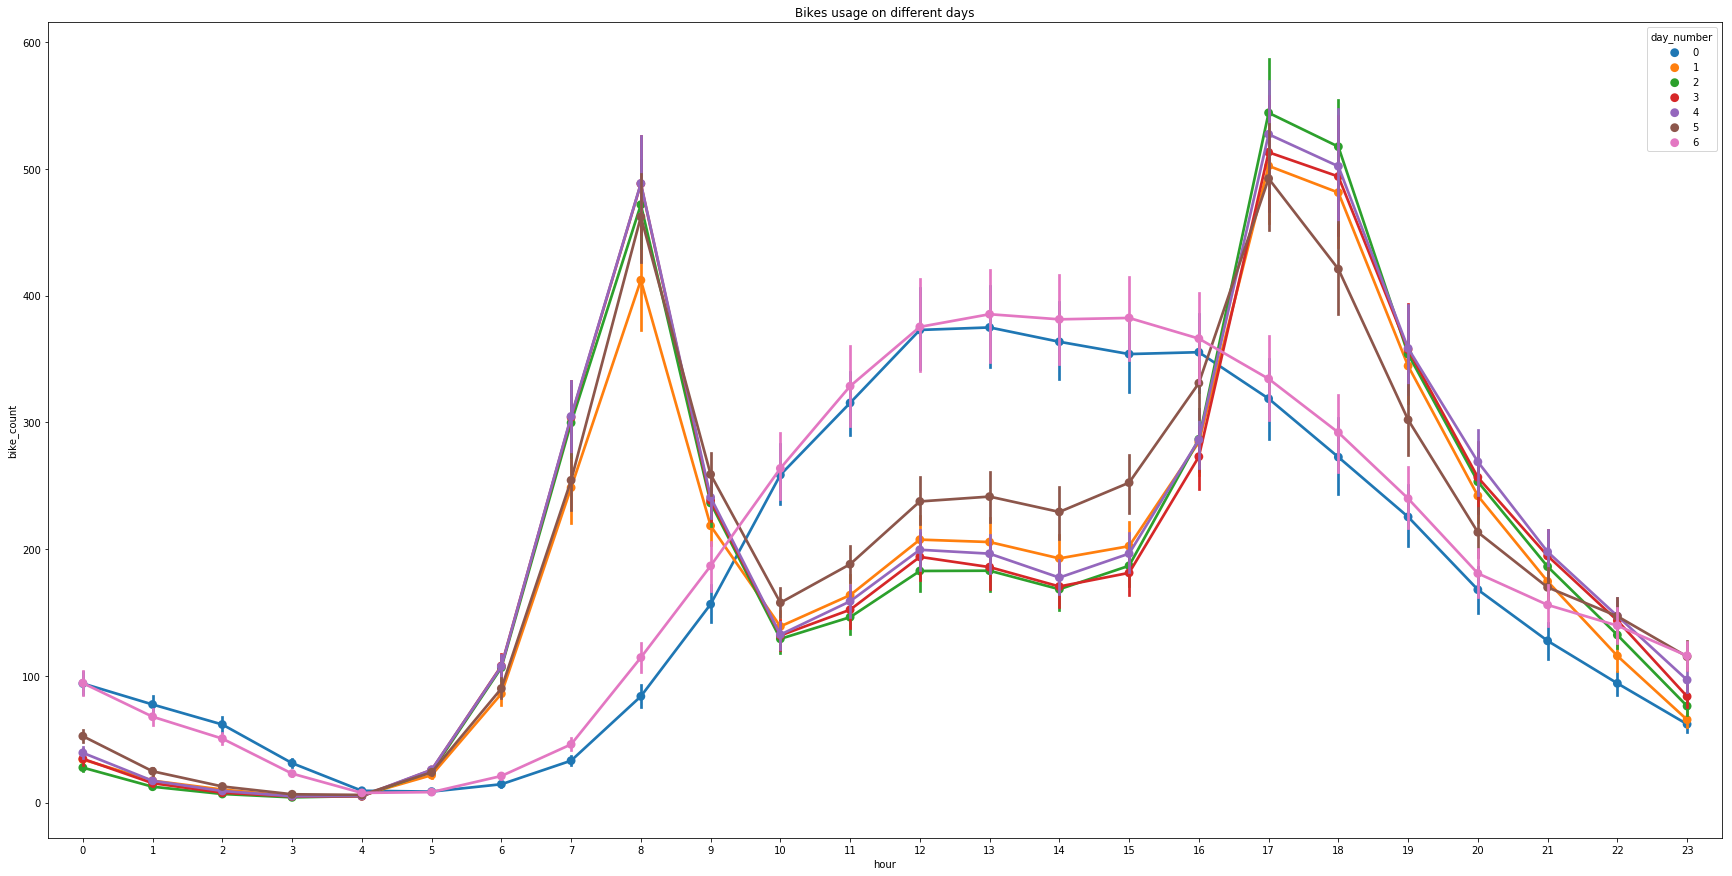

In [12]:
fig, ax = plt.subplots(figsize=(30, 15))
sn.pointplot(data=data[['hour','bike_count','day_number']],x='hour', y='bike_count', hue='day_number', ax=ax)
ax.set(title="Bikes usage on different days")

From the above plot, we can clearly see that during the weekdays (weekday 1-5), bikes are used mostly around 8 am, and around 17 (5 pm), which are logical since most employees, schools begin and finish on these times. In contrast, on the weekends (weekday 6 and 0), bikes are mostly used starting 12 pm. Generally, it seems bikes are generally more used in the weekdays than the weekends, which again makes sense.

**Let's check the difference between the usage of casual users and already registered users**

[Text(0.5, 1.0, 'Registered bikes usage during on different days')]

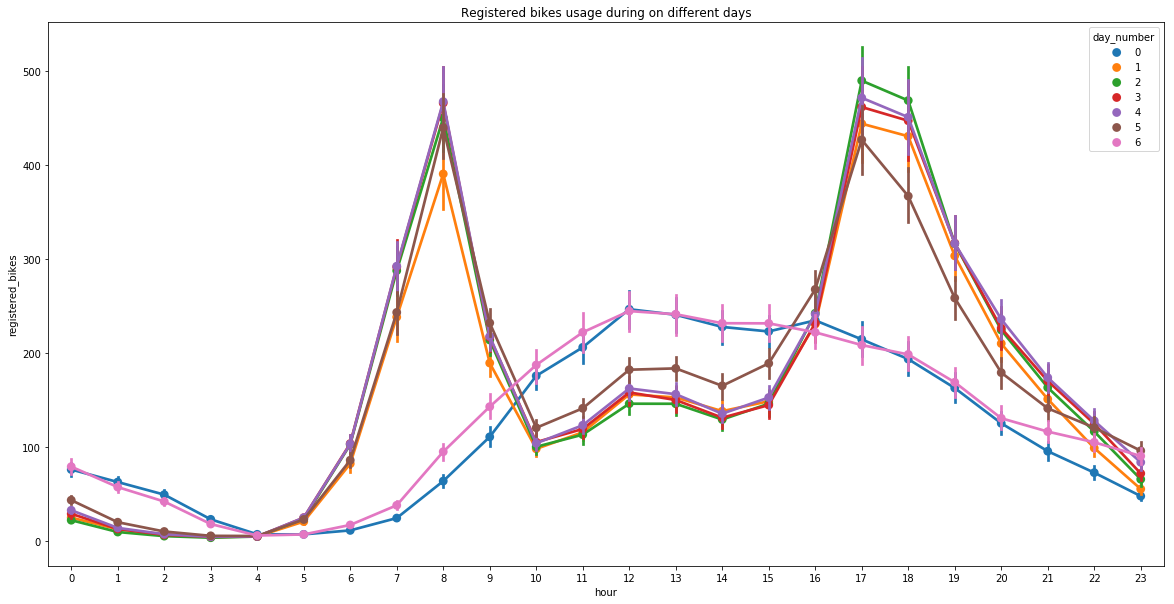

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
sn.pointplot(data=data[['hour','registered_bikes','day_number']],x='hour', y='registered_bikes', hue='day_number', ax=ax)
ax.set(title="Registered bikes usage during on different days")

[Text(0.5, 1.0, 'Casual bikes usage during on different days')]

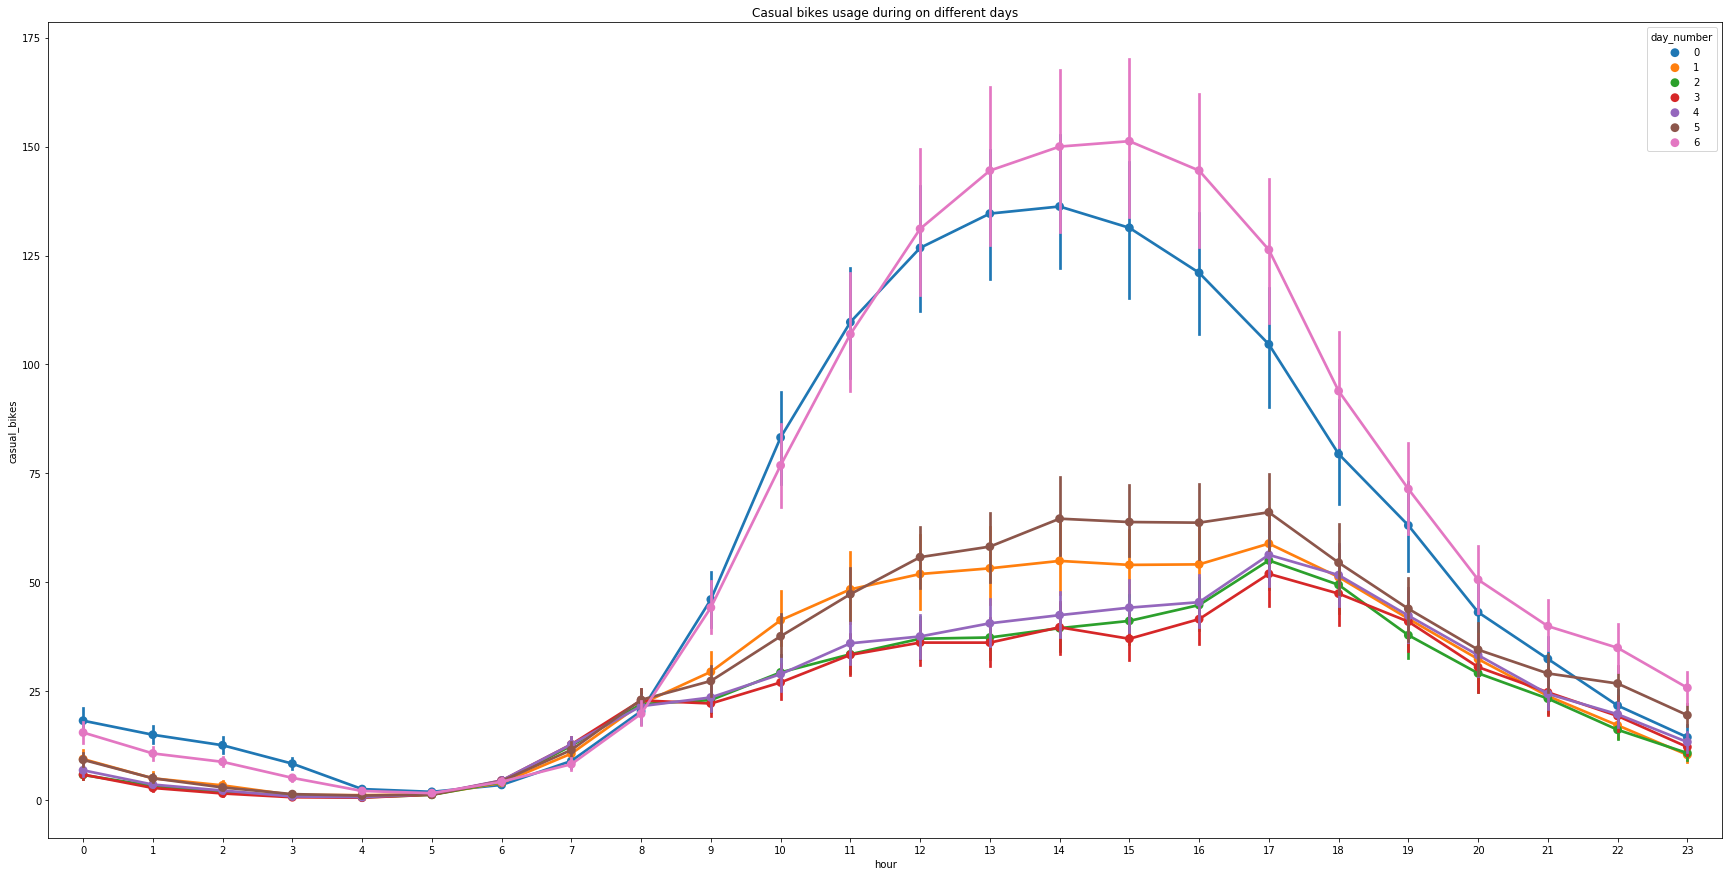

In [14]:
fig, ax = plt.subplots(figsize=(30, 15))
sn.pointplot(data=data[['hour','casual_bikes','day_number']],x='hour', y='casual_bikes', hue='day_number', ax=ax)
ax.set(title="Casual bikes usage during on different days")

So, it is very obvious that registered users tend to use their bikes mostly to go to work or school (work times 8-9 for going and 17-18 for returning. For casual users, they tend to use bikes during weekends, which is expected as it is cheaper if you use bikes often for work/school to be registered than to pay casually each day.

**It would also be cool to check the holidays**

[Text(0.5, 1.0, 'People usage during holidays and normal days')]

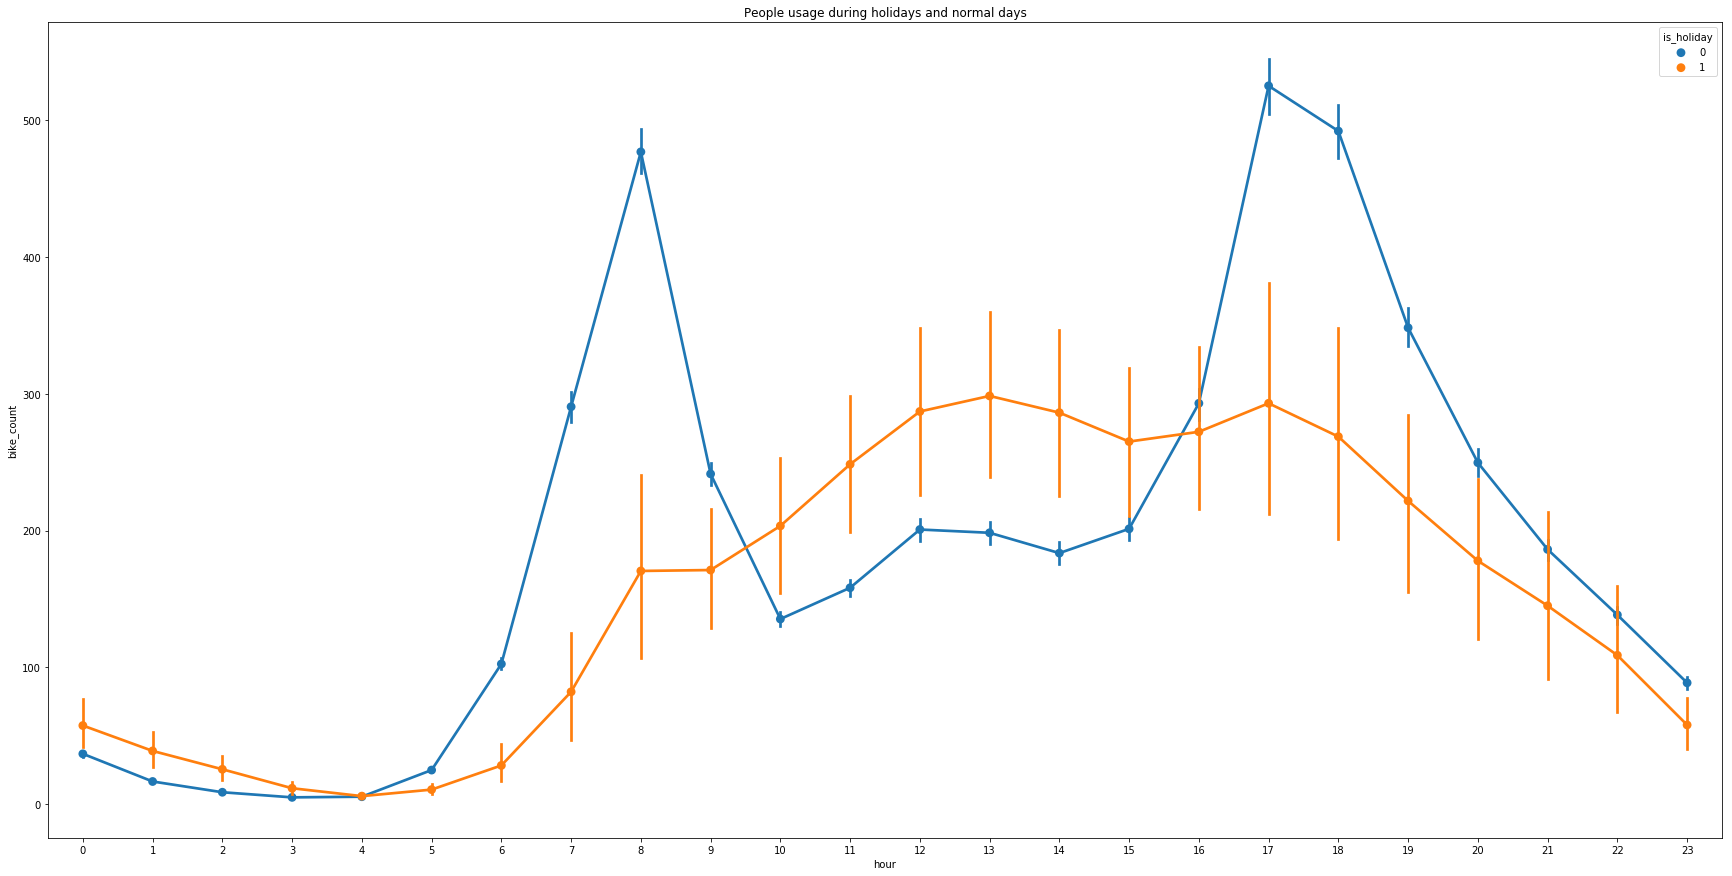

In [15]:
fig, ax = plt.subplots(figsize=(30, 15))
sn.pointplot(data=data[(data.day_number!=0) & (data.day_number!=6)][['hour','bike_count','is_holiday']],x='hour', y='bike_count', hue='is_holiday', ax=ax)
ax.set(title="People usage during holidays and normal days")


So, by eliminating the weekends, we can see that the trend for the holidays is very similar to the weekends, which is expected as high number of bikes are used starting around 12 pm during holidays similar to weekends

**Now for usage on different weather conditions and then different seasons**

[Text(0.5, 1.0, 'Bike usage during different weather conditions')]

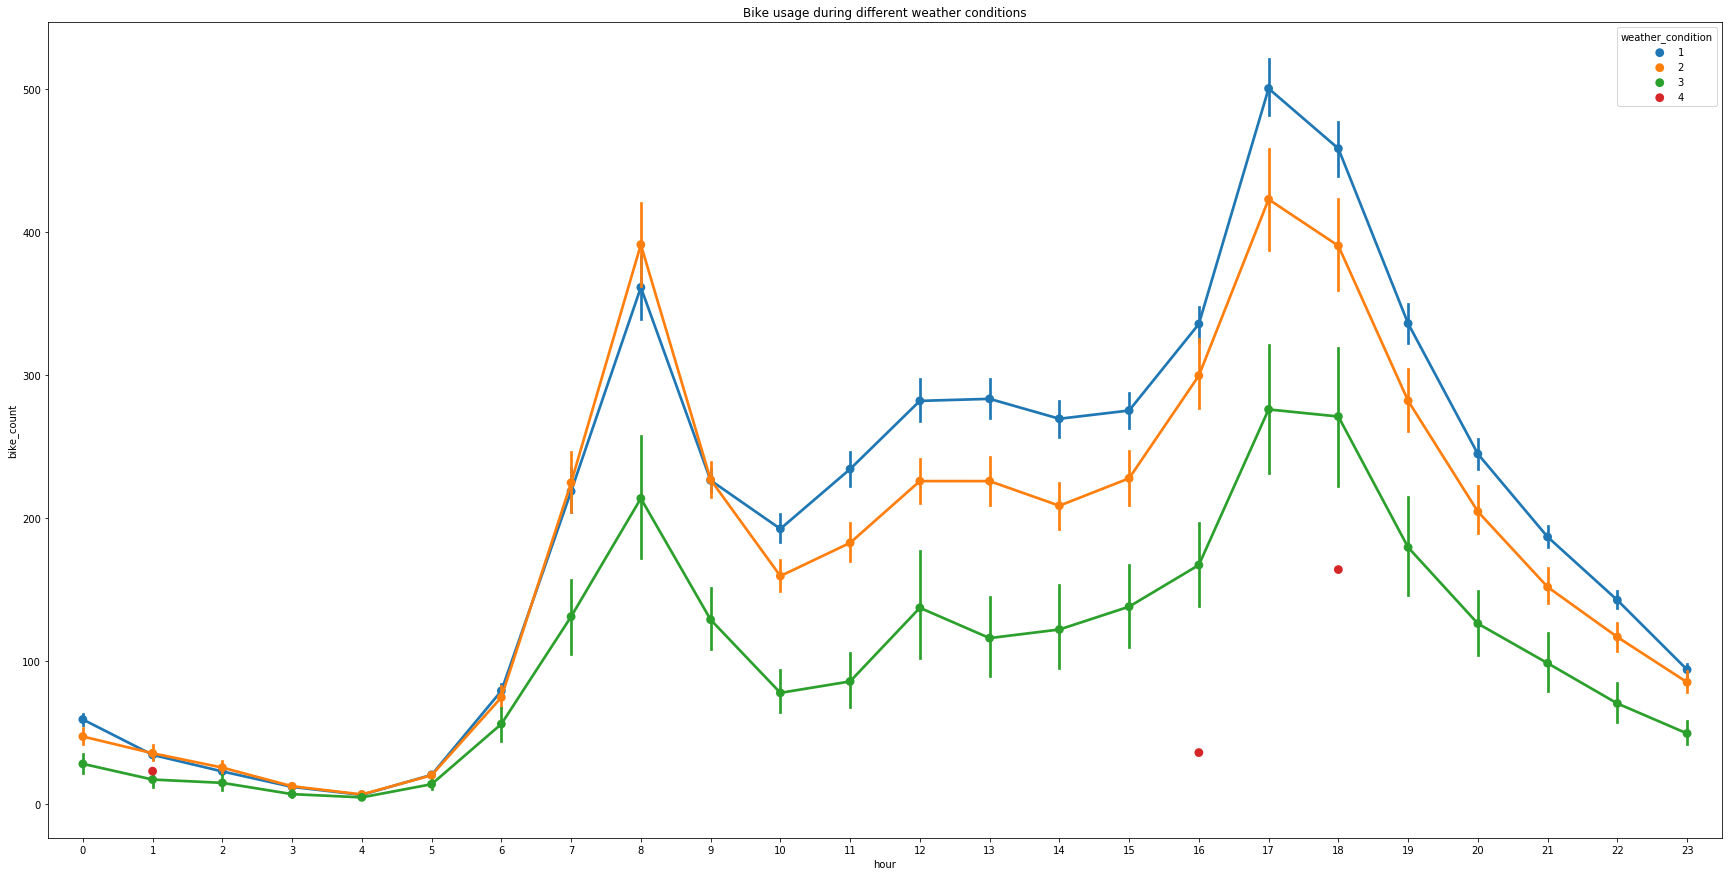

In [16]:
fig, ax = plt.subplots(figsize=(30, 15))
sn.pointplot(data=data[['hour','bike_count','weather_condition']],x='hour', y='bike_count', hue='weather_condition', ax=ax)
ax.set(title="Bike usage during different weather conditions")

People seem to use more bikes during weather condition 1&2 corresponding to clear and a bit cloudy and misty weather, followed naturally with rainy weather

**Now for different seasons (reminder: 1:Spring, 2:Summer, 3:Fall, 4:Winter)**

[Text(0.5, 1.0, 'Bike usage during different seasons')]

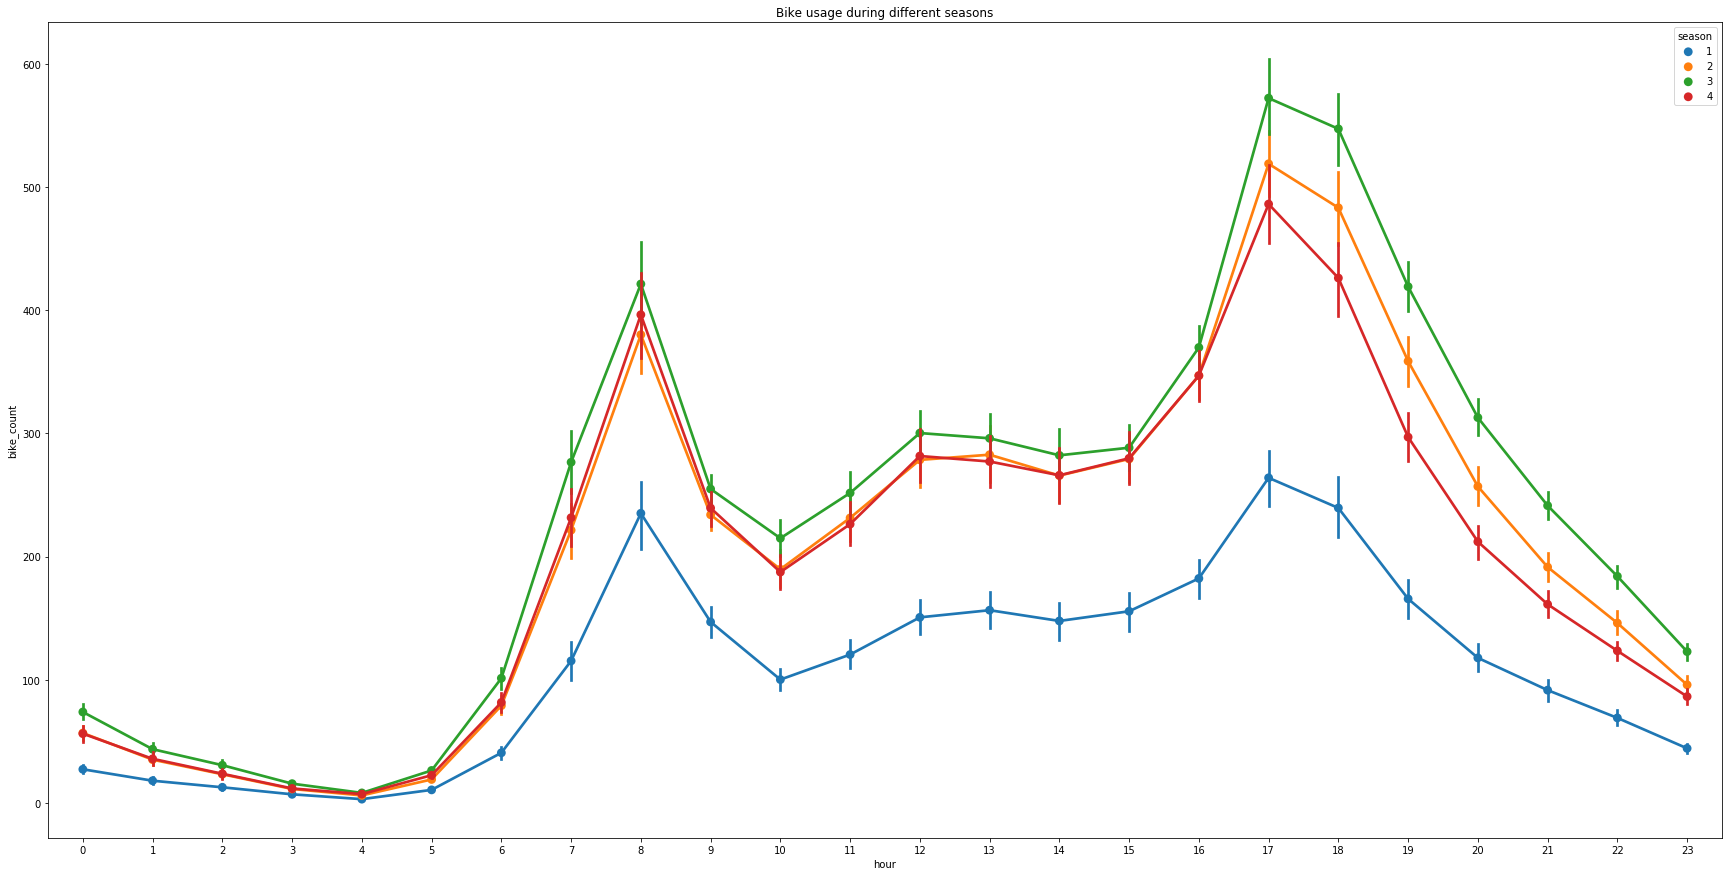

In [17]:
fig, ax = plt.subplots(figsize=(30, 15))
sn.pointplot(data=data[['hour','bike_count','season']],x='hour', y='bike_count', hue='season', ax=ax)
ax.set(title="Bike usage during different seasons")

We can observe that the bikes are used highest in fall, then summer a little bit more than winter, last is spring. Also we can see the gap increase in the night between summer and night, probably because it is too cold in winter.

**we can confirm this by this simple graph**

[Text(0.5, 1.0, 'Bike usage during different seasons')]

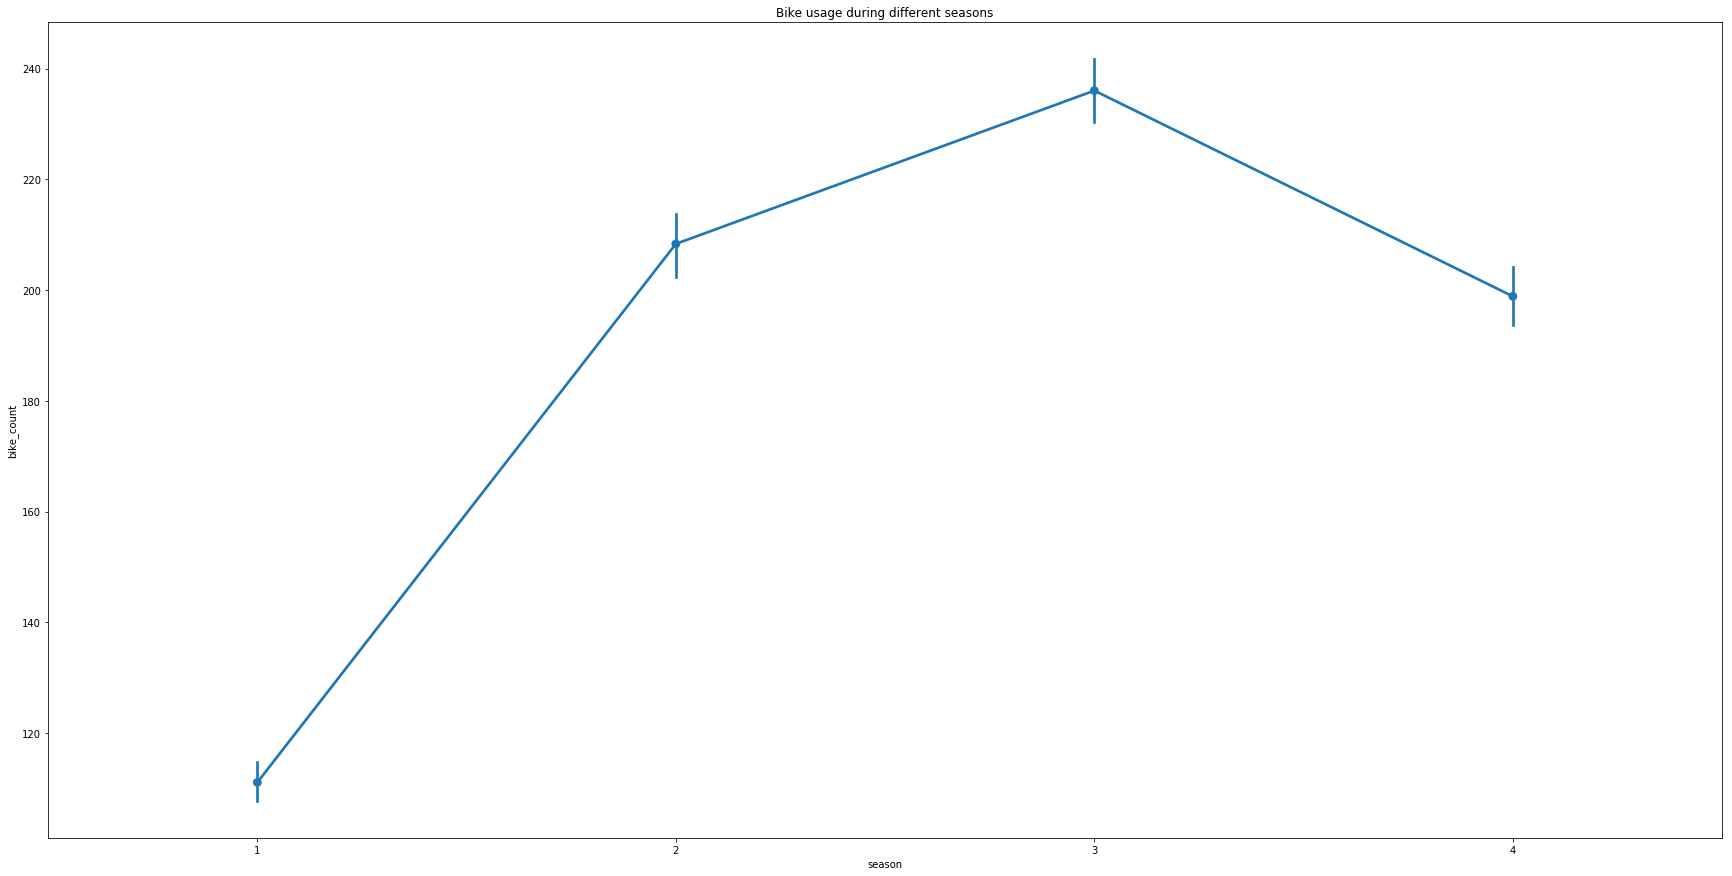

In [18]:
fig, ax = plt.subplots(figsize=(30, 15))
sn.pointplot(data=data[['bike_count','season']],x='season', y='bike_count', ax=ax)
ax.set(title="Bike usage during different seasons")

**Let's check the temperature now**

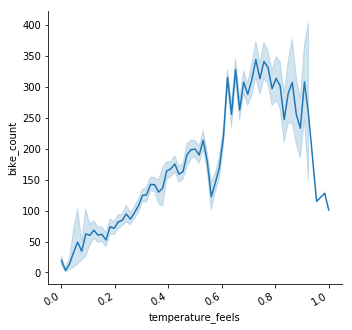

In [19]:
g = sn.relplot(x='temperature_feels', y='bike_count', kind="line", data=data[['bike_count','temperature_feels']])
g.fig.autofmt_xdate()


Very logical, for very low temperatures, the bike usage is low as in very high temperatures. In general, the warmer the temperature, the more bikes are used (but not too hot!)

## Correlation Analysis

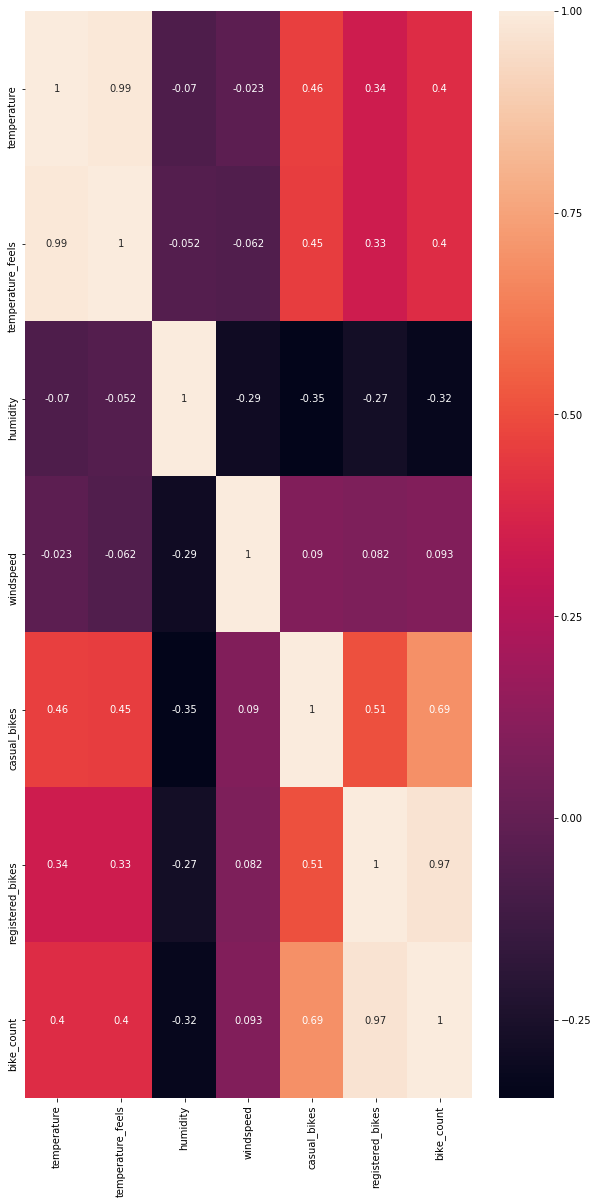

In [20]:
plt.figure(figsize=(10,20))
cor = data.corr()
sn.heatmap(cor, annot=True)
plt.show()

As observed, temperature_feels is exteremly correlated with temperature (which is expected), so will remove one of them (I will choose temperature_feels because logically it should include himidity in its calculation, however i doubt it will make an impact if we remove temperature instead because there is low correlation between temperature_feels and himidity). windspeed is highly uncorrelated with count as it is expected and so will remove it. since bike_count = registered_bikes + casual_bikes, they are a part of what we want to predict (bike_count), so we'll remove registered_bikes and casual_bikes also.

In [21]:
data = data.drop(['temperature_feels', 'windspeed', 'registered_bikes','casual_bikes'], axis=1)

In [22]:
data.dtypes

season               category
month                category
hour                 category
is_holiday           category
day_number           category
is_working_day       category
weather_condition    category
temperature           float64
humidity              float64
bike_count              int64
dtype: object

## Outlier Analysis

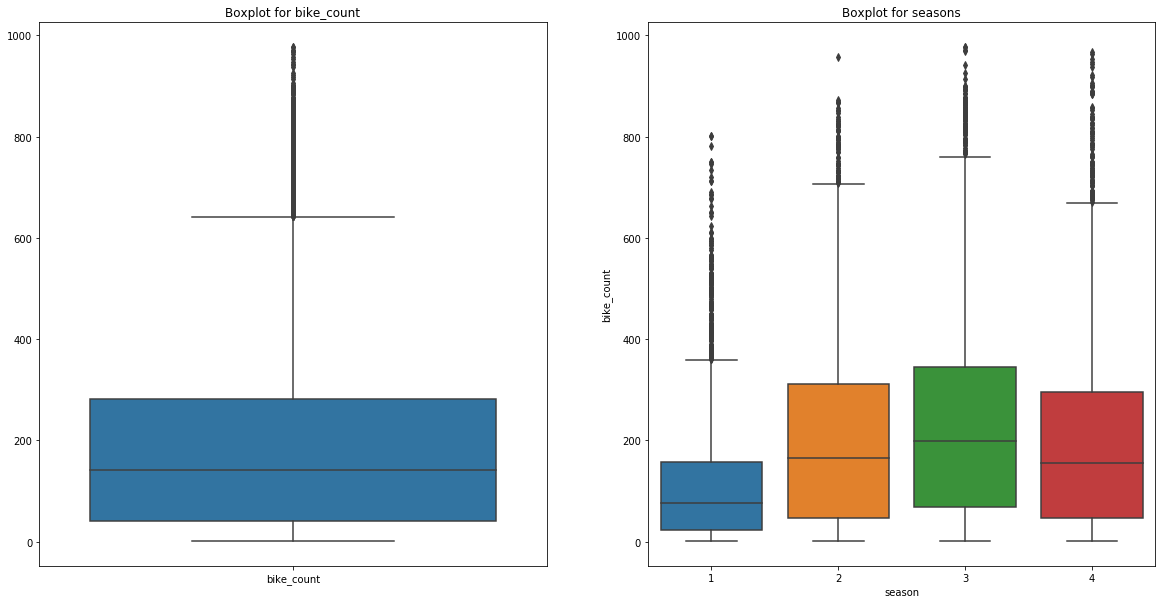

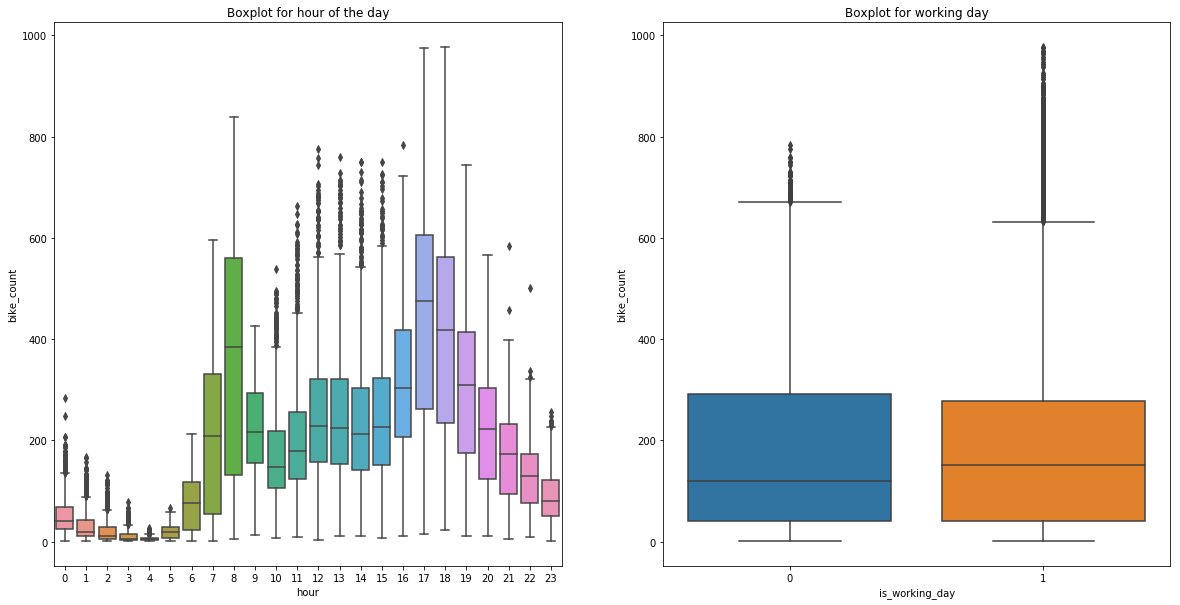

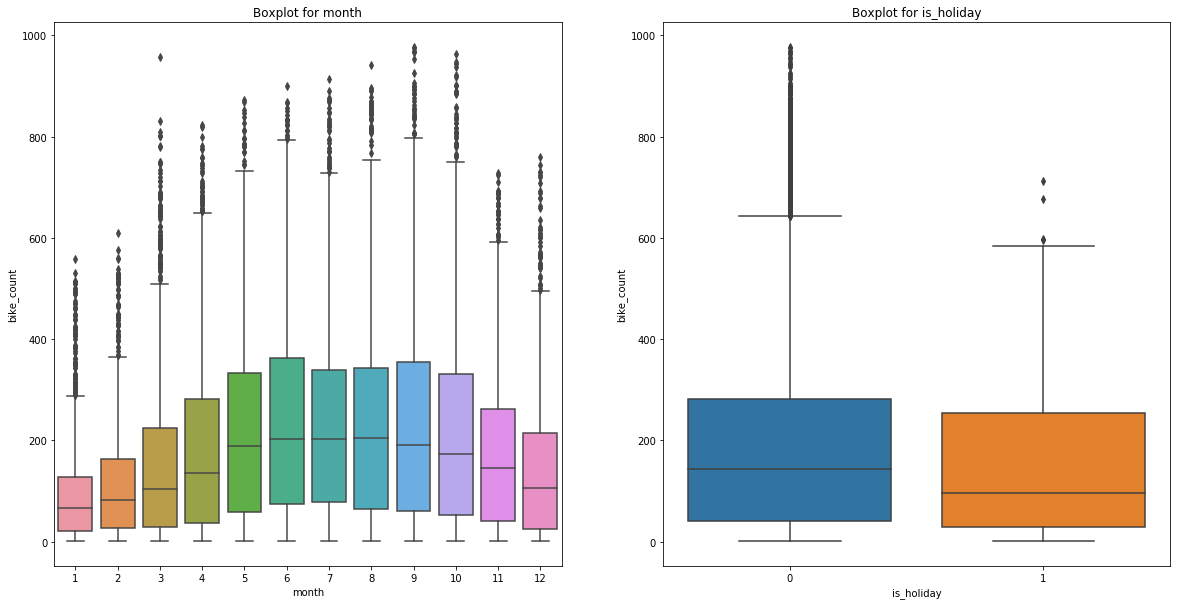

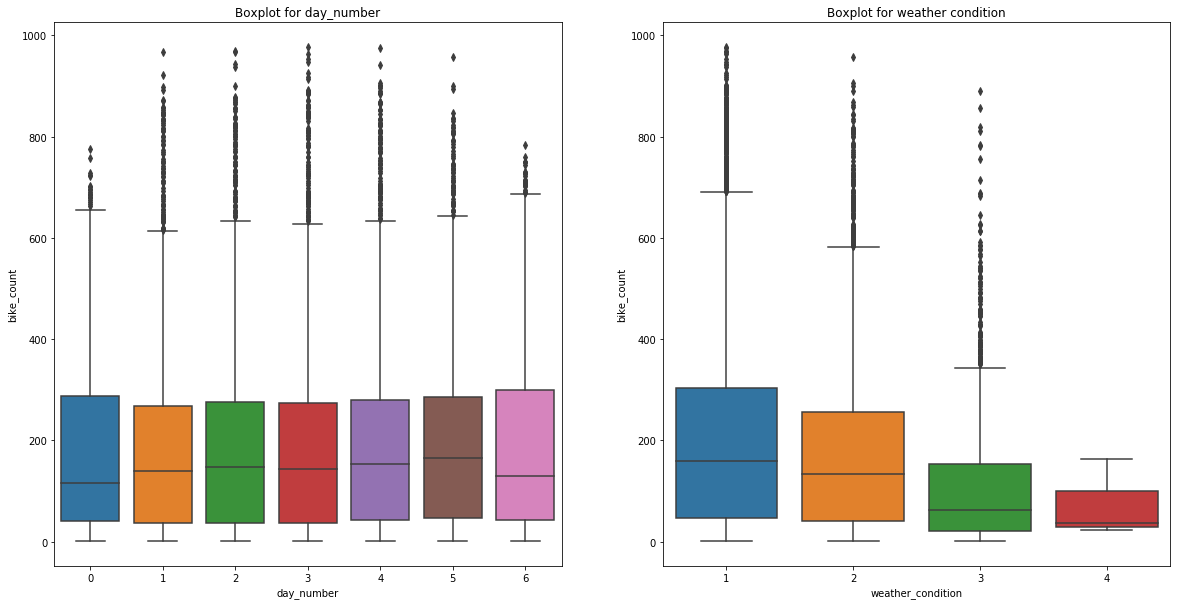

In [23]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,10))
sn.boxplot(data=data[['bike_count']], ax=ax1)
ax1.set(title="Boxplot for bike_count")
sn.boxplot(x=data['season'],y=data['bike_count'], ax=ax2)
ax2.set(title="Boxplot for seasons")

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,10))
ax1.set(title="Boxplot for hour of the day")
sn.boxplot(x=data['hour'],y=data['bike_count'], ax=ax1)
ax2.set(title="Boxplot for working day")
sn.boxplot(x=data['is_working_day'],y=data['bike_count'], ax=ax2)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,10))
ax1.set(title="Boxplot for month")
sn.boxplot(x=data['month'],y=data['bike_count'], ax=ax1)
ax2.set(title="Boxplot for is_holiday")
sn.boxplot(x=data['is_holiday'],y=data['bike_count'], ax=ax2)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,10))
ax1.set(title="Boxplot for day_number")
sn.boxplot(x=data['day_number'],y=data['bike_count'], ax=ax1)
ax2.set(title="Boxplot for weather condition")
sn.boxplot(x=data['weather_condition'],y=data['bike_count'], ax=ax2)

[Text(0.5, 1.0, 'Boxplot for himidity')]

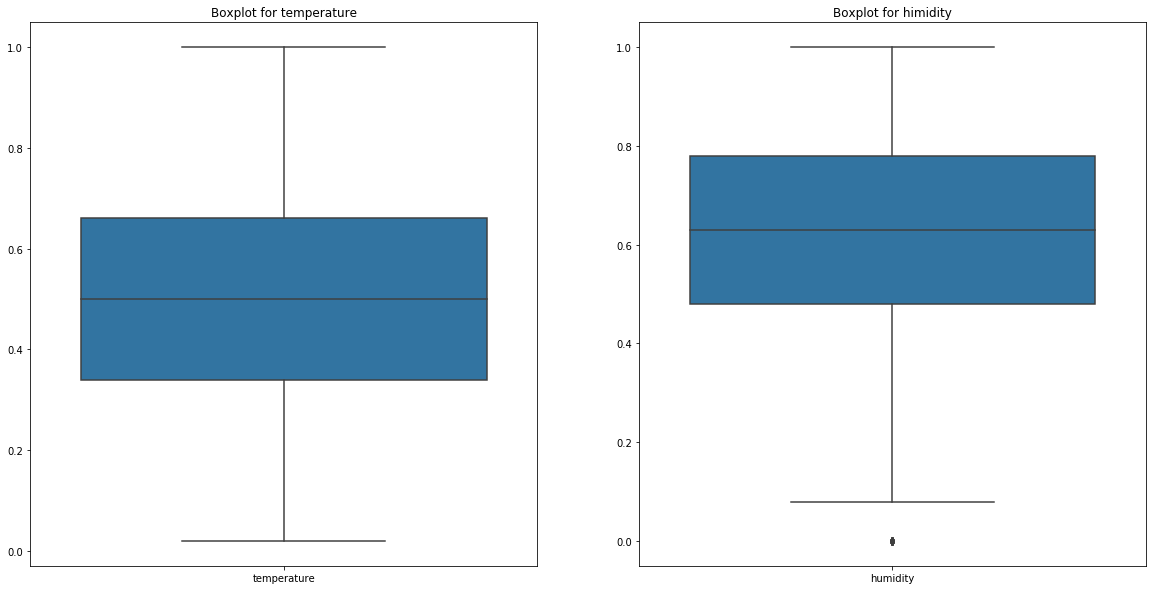

In [24]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,10))
sn.boxplot(data=data[['temperature']], ax=ax1)
ax1.set(title="Boxplot for temperature")
sn.boxplot(data=data[['humidity']], ax=ax2)
ax2.set(title="Boxplot for himidity")

In [25]:
from scipy import stats
import numpy as np

data_number = data.select_dtypes(include=["number"])
data_category = data.select_dtypes(exclude=["number"])
z = np.abs(stats.zscore(data_number))
index_clean = (z < 3).all(axis=1)
data_cleaned = pd.concat([data_number.loc[index_clean], data_category.loc[index_clean]], axis=1)

In [26]:
print(data.shape[0]-data_cleaned.shape[0])

266


[Text(0.5, 1.0, 'Distribution of count')]

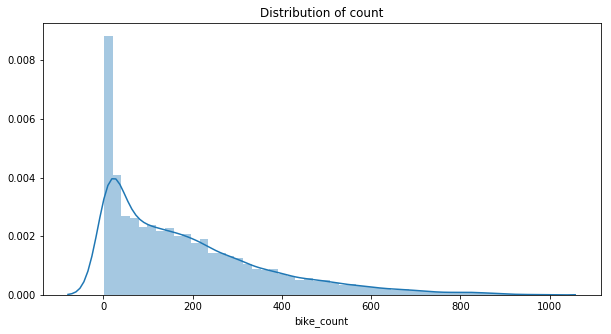

In [27]:
from statsmodels.graphics.gofplots import qqplot

fig, ax = plt.subplots(figsize=(10, 5))
sn.distplot(data['bike_count'], ax=ax)
ax.set(title="Distribution of count")

**Applying a log function helped with learning stability and convergence speed, probably because it transformed the distribution to be more like a normal distribution**

In [28]:
import math
import copy
data_log=data_cleaned.copy()
data_log['bike_count'] = data_cleaned['bike_count'].transform(lambda x: math.log(x))

[Text(0.5, 1.0, 'Distribution after log of count')]

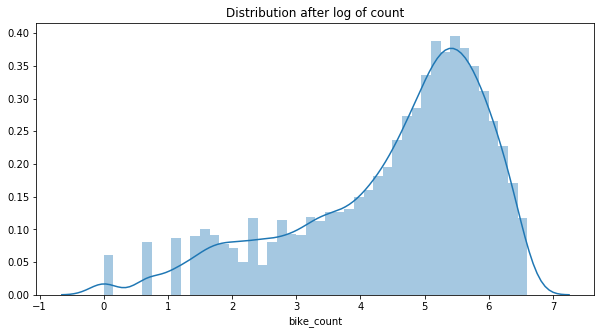

In [29]:
from statsmodels.graphics.gofplots import qqplot

fig, ax = plt.subplots(figsize=(10, 5))
sn.distplot(data_log['bike_count'], ax=ax)
ax.set(title="Distribution after log of count")

More similar to a normal distribution now

**Let's take a look after removing outliers**

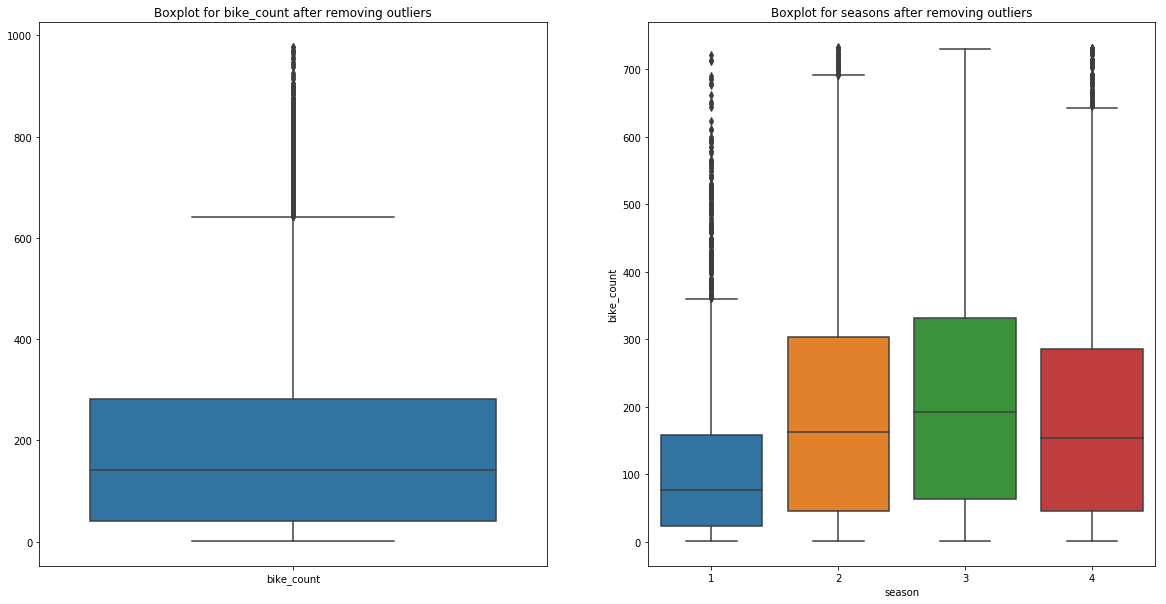

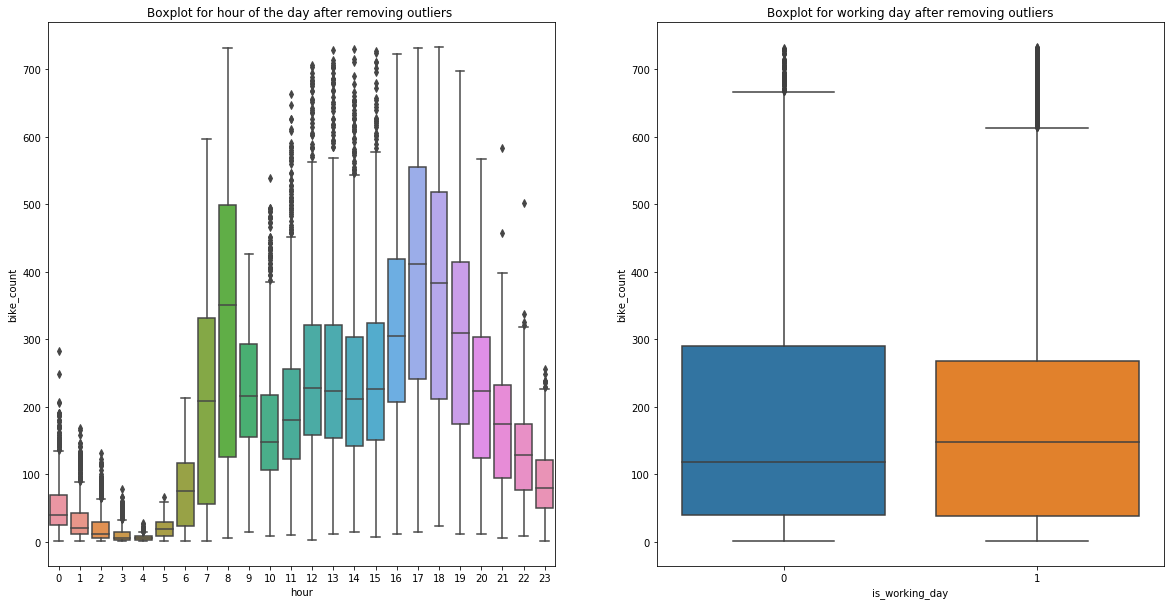

In [30]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,10))
sn.boxplot(data=data_number[['bike_count']], ax=ax1)
ax1.set(title="Boxplot for bike_count after removing outliers")
sn.boxplot(x=data_cleaned['season'],y=data_cleaned['bike_count'], ax=ax2)
ax2.set(title="Boxplot for seasons after removing outliers")

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,10))
ax1.set(title="Boxplot for hour of the day after removing outliers ")
sn.boxplot(x=data_cleaned['hour'],y=data_cleaned['bike_count'], ax=ax1)
ax2.set(title="Boxplot for working day after removing outliers")
sn.boxplot(x=data_cleaned['is_working_day'],y=data_cleaned['bike_count'], ax=ax2)

We can see that some of the previously visualized outliers were removed

**Before model fit, we have to convert the categorical features into one-hot encoding representation.**

In [31]:
data_dummy_log = data_log

def to_hot_encoder(df, column_to_remove):       
    df = pd.concat([df, pd.get_dummies(df[column_to_remove], prefix=column_to_remove, drop_first=False)],axis=1)
    df = df.drop([column_to_remove], axis=1)
    return df

columns_to_encode = ['season', 'month', 'hour', 'is_holiday', 'day_number', 'is_working_day', 'weather_condition']
for column in columns_to_encode:
    data_dummy_log = to_hot_encoder(data_dummy_log, column)
    
data_dummy_log.tail()

,temperature,humidity,bike_count,season_1,season_2,season_3,season_4,month_1,month_2,month_3,...,day_number_3,day_number_4,day_number_5,day_number_6,is_working_day_0,is_working_day_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4
17374,0.26,0.60,4.779123,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
17375,0.26,0.60,4.488636,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
17376,0.26,0.60,4.499810,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
17377,0.26,0.56,4.110874,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
17378,0.26,0.65,3.891820,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


**Now for splitting sets**

In [32]:
from sklearn.model_selection import train_test_split

y_log = data_dummy_log['bike_count']
X_log = data_dummy_log.drop(['bike_count'], axis=1)

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2)

**Now training multiple models to select the model with best score**

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

models = [LinearRegression(),
          Ridge(),
          HuberRegressor(),
          ElasticNetCV(),
          DecisionTreeRegressor(), 
          ExtraTreesRegressor(),
          GradientBoostingRegressor(),
          RandomForestRegressor(),
          BaggingRegressor(),
          MLPRegressor(max_iter=500)]

models_scores = pd.DataFrame(columns = ['Model', 'Score'])

def test_algorithms(model):
    kfold = model_selection.KFold(n_splits=10, random_state=0)
    predicted = model_selection.cross_val_score(model, X_train_log, y_train_log, cv=kfold, scoring='neg_mean_squared_error')
    score=predicted.mean()
    return score

best_score=100000
best_model=[]
for model in models:
    score=test_algorithms(model)
    models_scores  = models_scores.append({'Model': model, 'Score': score}, ignore_index = True)
    if abs(score)<best_score:
        best_score=abs(score)
        best_model=model

models_scores

,Model,Score
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",-3.217039e+18
1,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",-4.468898e-01
2,"HuberRegressor(alpha=0.0001, epsilon=1.35, fit...",-4.649545e-01
3,"ElasticNetCV(alphas=None, copy_X=True, cv='war...",-4.468923e-01
4,"DecisionTreeRegressor(criterion='mse', max_dep...",-3.452896e-01
5,"ExtraTreesRegressor(bootstrap=False, criterion...",-2.279602e-01
6,"GradientBoostingRegressor(alpha=0.9, criterion...",-3.088812e-01
7,"RandomForestRegressor(bootstrap=True, criterio...",-2.077347e-01
8,"BaggingRegressor(base_estimator=None, bootstra...",-2.059681e-01
9,"MLPRegressor(activation='relu', alpha=0.0001, ...",-1.798779e-01


Aaand MLP wins with the best negative mean squared error!

**Now we calculate the r2 score relative to the error based on log transformation, and we use the exponential function to calculate r2_score on the original values**

In [34]:
best_model.fit(X_train_log, y_train_log)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [35]:
import pickle
# save the model to disk
filename = 'trained_model.sav'
pickle.dump(best_model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_log, y_test_log)
print("r2 score of log values", result)

from sklearn.metrics import r2_score
y_pred_log = best_model.predict(X_test_log)
result=r2_score(np.exp(y_test_log), np.exp(y_pred_log))
print("r2 score of original values", result)

r2 score of log values 0.9156465797201259
r2 score of original values 0.8386595222613722


**Now we report the mean absolute of deviation of the error between predictions and targets from the test set**

In [36]:
error=np.exp(y_pred_log)-np.exp(y_test_log)
mean_absolute_deviation = error.mad()
print("The error mean absolute of deviation is", mean_absolute_deviation)

The error mean absolute of deviation is 44.56760313874624
